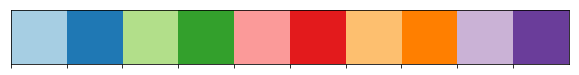

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.set(color_codes = True)
# sns.set_style('ticks')
cmap = sns.color_palette("Paired", 10)
sns.palplot(cmap)

In [2]:
#fname = "210625\\210625_Bi2Te3_p11_2mm_power_dep_f3p4_1.txt"
fname = "210714\\210714_Bi2Te3_n10_power_dep_f3p4_1.txt"
#fname2 = "210621\\210621_Bi2Te3_p11_power_dep_f3p4_combo.txt"
df = pd.read_csv(fname, sep = ',', header = 0)
#df2 = pd.read_csv(fname2, sep = ',', header = 0)

df.head()

,Date_time,Time,V_input,TC,SENS_X3,SENS_X1,X3,Y3,X1_ref,Y1_ref
0,2021-07-14 16:50:38.802318,900.0115,0.1,13,15,22,6.035010e-07,0.000000e+00,0.003492,0.000002
1,2021-07-14 17:05:38.895800,1800.1050,0.3,13,15,22,4.261760e-06,8.940730e-07,0.011015,0.000011
2,2021-07-14 17:20:38.977282,2700.1864,0.5,13,15,22,9.693260e-06,5.662480e-07,0.018051,0.000019
3,2021-07-14 17:35:39.053763,3600.2629,0.7,13,16,24,2.959380e-05,6.729410e-05,0.026100,-0.000046
4,2021-07-14 17:50:39.133245,4500.3424,0.9,13,16,24,1.966960e-05,5.564120e-05,0.034798,-0.000023


C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


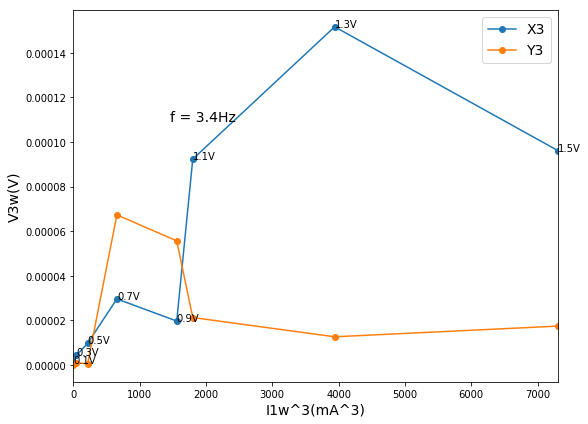

In [6]:
fz = 14
fig, ax = plt.subplots(1,1, figsize = (8,6))
Rref = 3#10.029#10.029#3.03
df['I1w'] = df['X1_ref']/Rref
ax.plot((df['I1w'])**3*1e9, df.X3, marker = 'o', linestyle = '-', label = 'X3')
ax.plot((df['I1w'])**3*1e9, df.Y3, marker = 'o', linestyle = '-', label = 'Y3')
p1 = np.polyfit(df['I1w']**3,df.X3,1)
p2 = np.polyfit(df['I1w']**3,df.Y3,1)
#ax.plot(df['I1w']**3*1e9, np.polyval(p1, df['I1w']**3), linestyle = '--',  label = 'X3_linearfit')
#ax.plot(df['I1w']**3*1e9, np.polyval(p2, df['I1w']**3), linestyle = '--',  label ='Y3_linearfit')
ax.set_xlabel('I1w^3(mA^3)', fontsize = fz)
ax.set_ylabel('V3w(V)', fontsize = fz)
ax.legend(loc = 'upper right', fontsize = fz)
ax.set_xlim([0, df['I1w'].max()**3*1e9])
#ax.set_ylim([-0.000001, 0.000005])

for i, txt in enumerate(df['V_input']):
    ax.annotate(str(txt) + 'V', (df['I1w'][i]**3*1e9, df['X3'][i]), fontsize = fz - 4)

ax.annotate('f = 3.4Hz', (0.2, 0.7), xycoords = 'axes fraction', fontsize = fz)
plt.tight_layout()
fig.savefig(fname[:-4] + '_power_dep_plot.png', dpi = 100)

C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


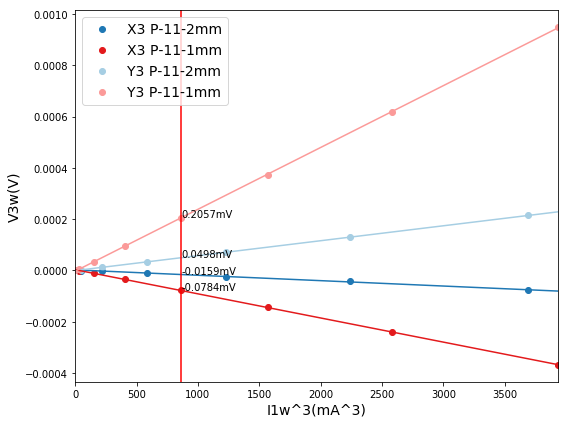

In [62]:
#df2: P-11-1mm  ; df: P-11-2mm
fz = 14
fig2, ax = plt.subplots(1,1, figsize = (8,6))
Rref = 10.029#10.029#3.03
df['I1w'] = df['X1_ref']/Rref
df2['I1w'] = df2['X1_ref']/Rref
ax.plot((df['I1w'])**3*1e9, df.X3, marker = 'o', linestyle = '', color = cmap[1], label = 'X3 P-11-2mm')
ax.plot((df2['I1w'])**3*1e9, df2.X3, marker = 'o', linestyle = '', color = cmap[5], label = 'X3 P-11-1mm')
ax.plot((df['I1w'])**3*1e9, df.Y3, marker = 'o', linestyle = '', color = cmap[0], label = 'Y3 P-11-2mm')
ax.plot((df2['I1w'])**3*1e9, df2.Y3, marker = 'o', linestyle = '', color = cmap[4], label = 'Y3 P-11-1mm')
p2x = np.polyfit(df['I1w']**3,df.X3,1)
p2y = np.polyfit(df['I1w']**3,df.Y3,1)
ax.plot(df['I1w']**3*1e9, np.polyval(p2x, df['I1w']**3), linestyle = '-', color = cmap[1])
ax.plot(df['I1w']**3*1e9, np.polyval(p2y, df['I1w']**3), linestyle = '-', color = cmap[0])
p1x = np.polyfit(df2['I1w']**3,df2.X3,1)
p1y = np.polyfit(df2['I1w']**3,df2.Y3,1)
ax.plot(df2['I1w']**3*1e9, np.polyval(p1x, df2['I1w']**3), linestyle = '-', color = cmap[5])
ax.plot(df2['I1w']**3*1e9, np.polyval(p1y, df2['I1w']**3), linestyle = '-', color = cmap[4])
ax.set_xlabel('I1w^3(mA^3)', fontsize = fz)
ax.set_ylabel('V3w(V)', fontsize = fz)
ax.legend(loc = 'upper left', fontsize = fz)
ax.set_xlim([0, df2['I1w'].max()**3*1e9])
#ax.set_ylim([-0.000001, 0.000005])
line_x = df2[df2['V_input'] == 0.9]['I1w'].values[0]
ax.axvline(x=line_x**3*1e9, color='r')
# for i, txt in enumerate(df2['V_input']):
#     ax.annotate(str(txt) + 'V', (df2['I1w'][i]**3*1e9, df2['X3'][i]), fontsize = fz - 4)
for i, fit in enumerate([p2x,p2y,p1x,p1y]):
    x = line_x**3*1e9
    y = np.polyval(fit,line_x**3)
    ax.annotate(str(round(y * 1e3,4)) + 'mV', (x, y), fontsize = fz - 4)

#ax.annotate('f = 3.4Hz', (0.2, 0.7), xycoords = 'axes fraction', fontsize = fz)
plt.tight_layout()
fig2.savefig('210625//Bi2Te3_P-11_1mm_2mm_power_dep_comp_plot_2.png', dpi = 100)

In [45]:
line_x.values[0]

0.009527470336025527